# Exploring Rental Price Trends Across the U.S. Using Data Visualization

You need to finish the following parts of the project now:

1. Importing data (the code to read the data).
2. Preprocessing the data (remove invalid data. If the data is in multiple tables/files, you may have to join them.
3. List what plots you plan to create in order to tell the story of your project. For example, "Bar plot for profits by departments", and "Histogram chart for student grades". Note that this is just a draft and you can change it later if necessary.


Please submit #3 above and add the link to the Github repository.

### 1. Importing data

In [25]:
import warnings
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Suppress DtypeWarning
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)

apartment_for_rent_classified = fetch_ucirepo(id=555)

# Extract relevant features from the dataset
df = apartment_for_rent_classified.data.features[["bathrooms", "bedrooms", "square_feet", "state", "latitude", "longitude", "price"]]

print(df.head())

# How many rows and columns are in the dataset?
print(f"Number of rows: {df.shape[0]}")


  bathrooms bedrooms square_feet state  latitude  longitude   price
0         1        1         542    CA   33.8520  -118.3759  2195.0
1       1.5        3        1500    VA   37.0867   -76.4941  1250.0
2         2        3        1650    NC   35.8230   -78.6438  1395.0
3         1        2         820    CA   38.3622  -121.9712  1600.0
4         1        1         624    NM   35.1038  -106.6110   975.0
Number of rows: 99826


### 2. Cleaning data

In [26]:
# convert state column to numeric column
df['state'] = df['state'].astype('category').cat.codes

# drop NAN values
df = df.dropna()

# print the first 5 rows of the modified DataFrame
print(df.head())

# How many rows and columns are in the dataset?
print(f"Number of rows after droppin NaN values: {df.shape[0]}")


  bathrooms bedrooms square_feet  state  latitude  longitude   price
0         1        1         542      5   33.8520  -118.3759  2195.0
1       1.5        3        1500     47   37.0867   -76.4941  1250.0
2         2        3        1650     28   35.8230   -78.6438  1395.0
3         1        2         820      5   38.3622  -121.9712  1600.0
4         1        1         624     33   35.1038  -106.6110   975.0
Number of rows after droppin NaN values: 99608


/var/folders/2j/zj0qfkhn7wjdr3q8fz2tmn_00000gn/T/ipykernel_78848/1684743215.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 3. Data Visualization

#### 3.1 Histogram & Box Plot 

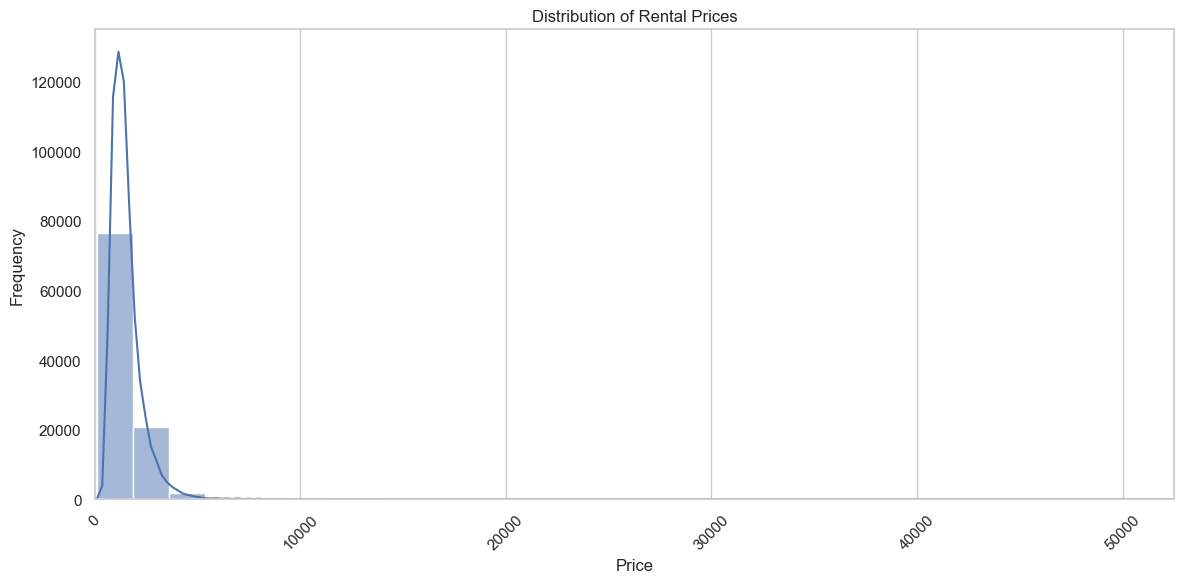

In [27]:
# Analyze rental price distribution and identify outliers. 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.dates as mdates
import datetime

# Set the style of seaborn
sns.set(style="whitegrid")
# Set the figure size
plt.figure(figsize=(12, 6))
# Plot the distribution of rental prices
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Rental Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, df['price'].max())
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### 3.2 Bar Chart  

/var/folders/2j/zj0qfkhn7wjdr3q8fz2tmn_00000gn/T/ipykernel_78848/216825719.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




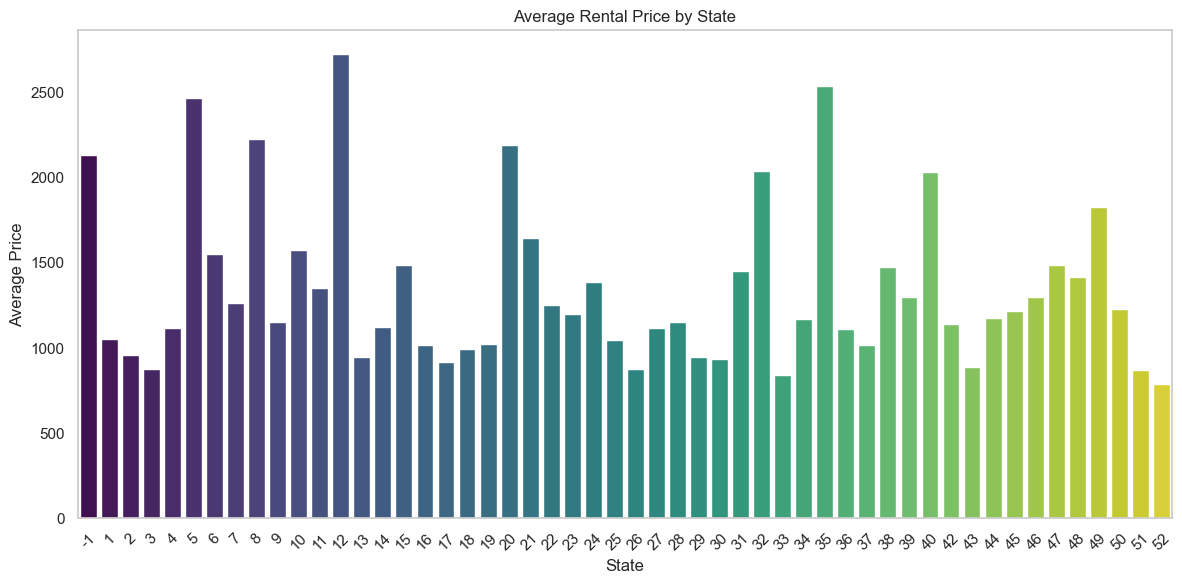

In [28]:
# Compare average rental prices across different states. Use Bar charts
plt.figure(figsize=(12, 6)) 
# Group by state and calculate the average price
avg_price_by_state = df.groupby('state')['price'].mean().reset_index()
# Sort the values by price
avg_price_by_state = avg_price_by_state.sort_values(by='price', ascending=False)
# Plot the average price by state
sns.barplot(x='state', y='price', data=avg_price_by_state, palette='viridis')
plt.title('Average Rental Price by State')
plt.xlabel('State')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### 3.3 Geographical Heatmap 

In [29]:
# Visualize rental price variations across U.S. states. Use geographic heatmaps 
import plotly.express as px
# Calculate average price by state
avg_price_by_state = df.groupby("state")["price"].mean().reset_index()

# Create a geographical heatmap
fig = px.choropleth(avg_price_by_state,
                   locations='state',
                   locationmode="USA-states",
                   color='price',
                   color_continuous_scale="inferno",
                   scope="usa",
                   labels={'price':'Average Rental Price'},
                   title='Geographical Heatmap of Average Rental Prices by State')

fig.update_layout(geo=dict(bgcolor= 'rgba(0,0,0,0)'))
fig.show()



#### 3.4 Scatter Plot with Regression Line

TypeError: 'value' must be an instance of str or bytes, not a float

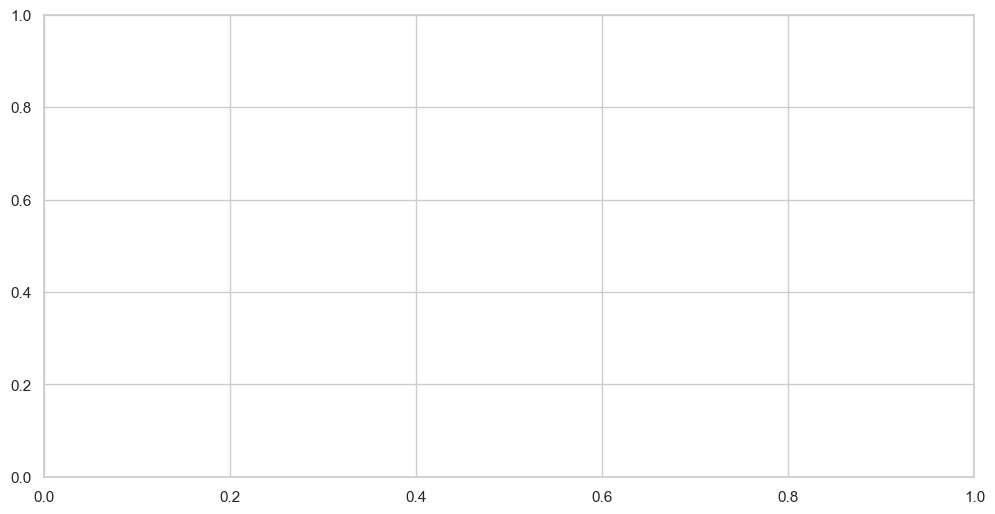

In [ ]:
# Show relationship between square footage and price.
plt.figure(figsize=(12, 6))
# Create a scatter plot
sns.scatterplot(x='square_feet', y='price', data=df, alpha=0.6)
plt.title('Square Footage vs Rental Price')
plt.xlabel('Square Footage')
plt.ylabel('Rental Price')
plt.xlim(0, df['square_feet'].max())
plt.ylim(0, df['price'].max())  
plt.grid()
plt.tight_layout()
plt.show()


#### 3.5 Heatmap

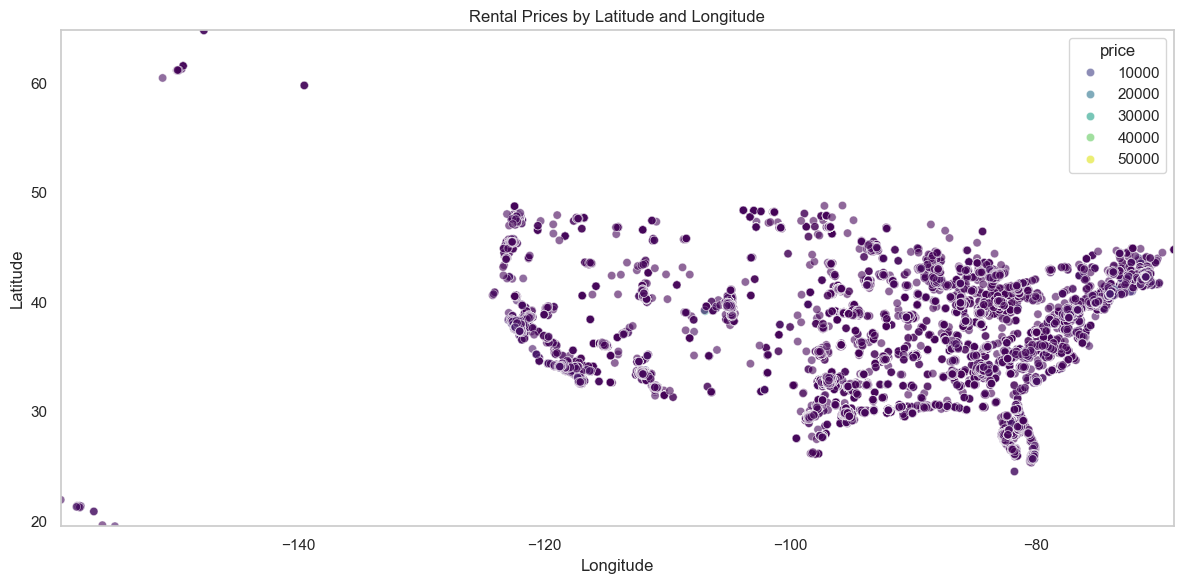

In [ ]:
# Identify high and low rental price areas based on latitude & longitude.   
plt.figure(figsize=(12, 6))
# Create a scatter plot
sns.scatterplot(x='longitude', y='latitude', hue='price', data=df, palette='viridis', alpha=0.6)
plt.title('Rental Prices by Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(df['longitude'].min(), df['longitude'].max())  
plt.ylim(df['latitude'].min(), df['latitude'].max())
plt.grid()
plt.tight_layout()
plt.show()
